In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Reading = pd.read_csv("/content/sample_data/ad.csv")
Reading.head()

,Serial No.,GRE Score,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# New Section

In [ ]:
Reading.describe()

,Serial No.,GRE Score,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
Null=Reading.isnull()
Null.sum()

Serial No.           0
GRE Score            0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Renaming Columns for better understanding

In [ ]:
# Reading = Reading.rename(columns={'GRE Score': 'GRE Score', 'TOEFL Score': 'TOEFL Score', 'LOR ': 'LOR', 'Chance of Admit ': 'Admit Possibilty'})
# Reading.head()

In [ ]:
# Visualization ( Checking the Spread of Data for each features in Dataset )

In [ ]:
gre_score = Reading[["GRE Score"]]
toefl_score = Reading[["TOEFL"]]
uni_rating = Reading[["University Rating"]]
cgpa = Reading[["CGPA"]]

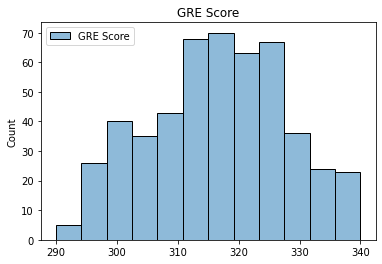

In [ ]:
fig = sns.histplot(gre_score,color='black',kde=False)
plt.title("GRE Score")
plt.show()

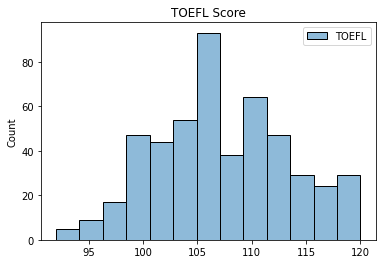

In [ ]:
fig = sns.histplot(toefl_score,color='r',kde=False)
plt.title("TOEFL Score")
plt.show()

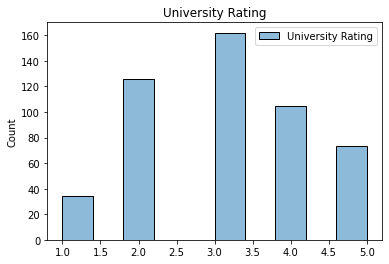

In [ ]:
fig = sns.histplot(uni_rating,color='r',kde=False)
plt.title("University Rating")
plt.show()

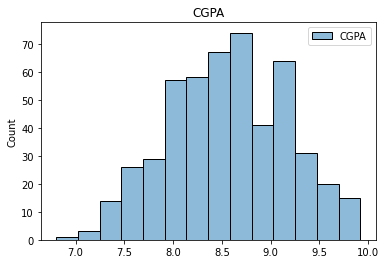

In [ ]:
fig = sns.histplot(cgpa,color='r',kde=False)
plt.title("CGPA")
plt.show()

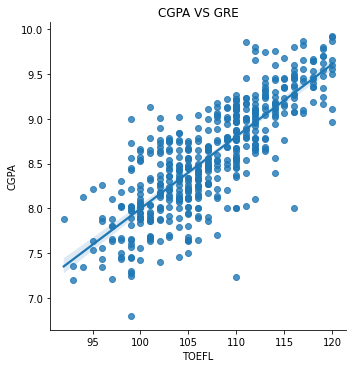

In [ ]:
fig=sns.lmplot(x="GRE Score",y="CGPA",data=Reading)
plt.title("CGPA VS GRE")
plt.show()

In [ ]:
# as we can see the students who performed well in UG also did well in GRE

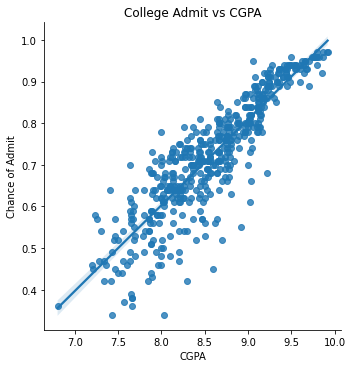

In [ ]:
fig=sns.lmplot(x="CGPA",y="Chance of Admit",data=Reading)
plt.title("College Admit vs CGPA")
plt.show()

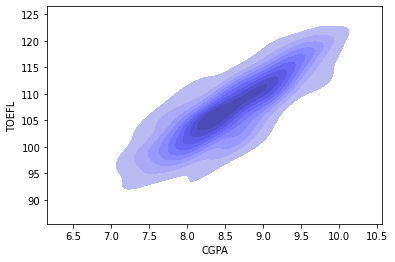

In [ ]:
fig=sns.kdeplot(x="CGPA",y="TOEFL",data=Reading,shade="fill",color='b')
plt.show()

In [ ]:
#cgpa and toefl score are positive co-related

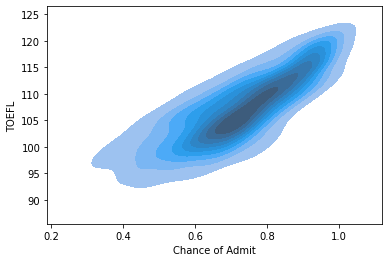

In [ ]:
fig=sns.kdeplot(x="Chance of Admit",y="TOEFL",data=Reading,shade="fill")
plt.show()

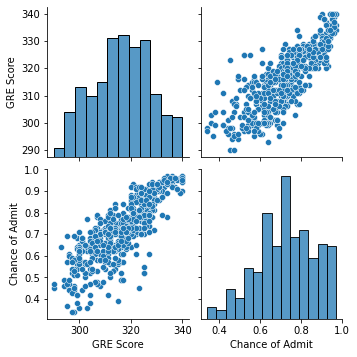

In [ ]:
sns.pairplot(data=Reading,vars=["GRE Score","Chance of Admit"])
plt.show()

In [ ]:
#we can see that gre score is heavily co releated for college admit


Prediction

Cross_val_score is used for calculating the accuracy for the generated regression model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Deleting Chance of Admit and calculating chance for user input

In [ ]:
x=Reading.drop('Chance of Admit',axis='columns')
y=Reading['Chance of Admit']
x_train,x_test,y_train,y_test=train_test_split(x, y)

In [ ]:
x_train.shape

(375, 8)

In [ ]:
x_test.shape

(125, 8)

In [ ]:
y_test.shape

(125,)

In [ ]:
y_train.shape

(375,)

In [ ]:
linear_regression = LinearRegression()
linear_regression = linear_regression.fit(x_train,y_train)

In [ ]:
model = LinearRegression()
model.fit(x_test, y_test)
model.score(x_test, y_test)

0.7967995703581592

In [ ]:
print('The chance of you getting an admit in the US is {}%'.format(round(model.predict([[1,303, 108, 4, 4.5, 4.5, 8.35, 0]])[0]*100, 1)))

The chance of you getting an admit in the US is 68.3%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


RandomForestRegressor is used to find averaging of all th generated models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000,random_state=42)

rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
predictions=rf.predict(x_test)
errors=abs(predictions-y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.05 degrees.


In [ ]:
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.4 %.


In [ ]:
print('The chance of you getting an admit in the US is {}%'.format(round(rf.predict([[2,330, 108, 4, 4.5, 4.5, 8.35, 0]])[0]*100, 1)))

The chance of you getting an admit in the US is 61.9%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print('The chance of you getting an admit in the US is {}%'.format(round(model.predict([[5,303, 108, 4, 4.5, 4.5, 8.35, 0]])[0]*100, 1)))

The chance of you getting an admit in the US is 68.4%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print('The chance of you getting an admit in the US is {}%'.format(round(rf.predict([[3,320,110,4,4,4,9.5,1]])[0]*100, 1)))

The chance of you getting an admit in the US is 95.0%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# New Section